In [1]:
# project: p1
# submitter: tjones25
# partner: none

# Part 1

In [2]:
import matplotlib
import os
from matplotlib import pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

In [3]:
#q1

#general git setup given by professor
from git import Repo
dirname = "repo"
repo = Repo(dirname)
repo.git.checkout("master")

#takes commit items and places them in list, then counts the number
list_of_commits = list(repo.iter_commits('master'))
len(list_of_commits)

8

In [4]:
#q2

#creates a list of author names
list_of_authors = []
for i in range(len(list_of_commits)):
    list_of_authors.append(list_of_commits[i].author.name)
    
#this code was taken from
#https://stackoverflow.com/questions/3496518/using-a-dictionary-to-count-the-items-in-a-list
#sorts and counts the authors into created dict
authors = dict()
for i in list_of_authors:
    authors[i] = authors.get(i, 0) + 1
authors

{'Steve': 3, 'Ada': 3, 'Linus': 2}

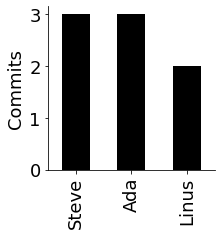

In [5]:
#q3

#need to turn dict into Series for plot to work
a = Series(authors)
matplotlib.rcParams["font.size"] = 18

#base code given by professor
def get_ax():
    ax = plt.subplot()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    return ax

#example given by professor
ax = get_ax()
ax.set_ylabel("Commits")
a.plot.bar(figsize=(3,3), color="0")

In [6]:
#q4

from datetime import datetime

weekenders = set()
#iterates through commits, used datetime to find the day it as commited, then adds the author name if it was sat or sun
for i in list_of_commits:
    dt = datetime.fromtimestamp(i.authored_date)
    day = datetime.weekday(dt)
    if day > 5:
        weekenders.add(i.author.name)
weekenders

{'Steve'}

In [7]:
#q5

#creates dict, opens commit version of wc.py, the ncounts lines and adds relevant data
size = dict()
for i in list_of_commits:
    
    repo.git.checkout(i)

    count = 0
    with open(os.path.join("repo", "wc.py"), 'r') as f:
        for line in f:
            count +=1
    
    days = i.authored_date - list_of_commits[-1].authored_date 
    
    size[days/(60*60*24)] = count

data = list(reversed(list(size.items())))
df = DataFrame(data, columns = ['days','lines'])
df

,days,lines
0,0.000000,21
1,1.005046,35
2,3.880046,35
3,4.087963,39
4,5.921296,40
5,6.962963,40
6,9.171296,40
7,11.046296,43


(0.0, 11.598611111111111)

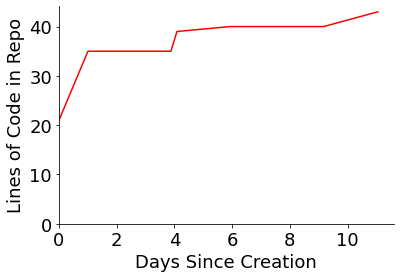

In [8]:
#q6

s = Series(size)
line = s.plot.line(color='r')
matplotlib.rcParams["font.size"] = 16
line.spines["top"].set_visible(False)
line.spines["right"].set_visible(False)
line.set_ylabel("Lines of Code in Repo")
line.set_xlabel("Days Since Creation")
line.set_ylim(bottom=0)
line.set_xlim(0)

# Part 2

In [9]:
import json
import subprocess

def run_wc(body, commit=None):
    if commit == None:
        last = list_of_commits[0]
        repo.git.checkout(last)
    else:
        repo.git.checkout(commit)
        
    with open(os.path.join("repo", "test.txt"), 'w') as f:
        f.write(body)
    
    try:
        arg = 'python3 ' + str(os.path.join("repo", "wc.py")) + ' ' + str(os.path.join("repo", "test.txt")) + ' ' + 'ALL'
        output = subprocess.check_output(arg, shell=True, universal_newlines=True)
        
        with open(os.path.join("repo", "wc.json"), 'w') as f:
            f.write(output)
        
        return json.loads(output)
    except:
        output = 'None'
        
        with open(os.path.join("repo", "wc.json"), 'w') as f:
            f.write(output)
        
        return output
    
    
    
# test inputs to exercise wc.py

# expected result: {'X': 1, 'Y': 1, 'Z': 1}
test1 = """X Y Z"""

# expected result: 
test2 = """A B
A C
"""

# expected result: {'A': 2, 'B': 1, 'C': 1}
test3 = """A B
a c
"""

In [10]:
#q7

run_wc(test1)

{'X': 1, 'Y': 1, 'Z': 1}

In [11]:
#q8
run_wc(test2)

{'A': 2, 'B': 1, 'C': 1}

In [12]:
def test_table(body, expected):
    final = DataFrame({'commit':[], 'msg20':[], 'author':[], 'pass':[]})
    rev = list_of_commits[::-1]
    for i in rev:
        author = i.author.name
        commit = str(i)
        msg = i.message
        if len(msg) > 20:
            msg = msg[0:20]
        
        act = run_wc(body, i)
        if act == expected:
            end = 'True'
        else:
            end = 'False'
        
        final = final.append(DataFrame({'commit':[commit], 'msg20':[msg.rstrip()], 'author':[author], 'pass':[end]}), ignore_index=True)

    return final

In [13]:
#q9

test_table(test1, {'X': 1, 'Y': 1, 'Z': 1})

,commit,msg20,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,Linus,True
2,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,Steve,True


In [14]:
#q10

test_table(test2, {'A': 2, 'B': 1, 'C': 1})

,commit,msg20,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,Steve,True


In [15]:
#q11

test_table(test3, {'A': 2, 'B': 1, 'C': 1})

,commit,msg20,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,Linus,False
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,Steve,True


Test 3 is most usful when testing wc.py since it includes the most varience, with both capital and lowercase letters as well as a new line. This provides more chances for the method to show bugs. 

# Part 3

In [16]:
import random
import time

def time_run_sec(uniq_words, total_words, word_size=6, commit=None):
    string = 'abcdefghijklmnopqrstuvwxyz'
    uniq = list()
    for i in range(uniq_words):
        word = ''
        for j in range(word_size):
            letter = random.choice(string)
            word = word + letter
        word = word + (' \n')
        uniq.append(word)
    
    final = ''
    for i in range(total_words):
        final = final + random.choice(uniq)
        
    with open(os.path.join("repo", "test.txt"), 'w') as f:
        f.write(final)    
    
    if commit == None:
        last = list_of_commits[0]
        repo.git.checkout(last)
        
    else:
        repo.git.checkout(commit)
        
    t0 = time.time()   
    arg = 'python3 ' + str(os.path.join("repo", "wc.py")) + ' ' + str(os.path.join("repo", "test.txt")) + ' ' + 'ALL'
    output = subprocess.check_output(arg, shell=True, universal_newlines=True)
    t1 = time.time()
    
    return(t1-t0)

def execute_times(uniq_words, total_words):
    exc_times = dict()
    for i in versions:
        time = time_run_sec(uniq_words, total_words, commit=versions[i])
        exc_times[i] = time
    return exc_times

versions = {
    "v3-single-pass": "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4",
    "v2-pass-per-uniq": "c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5",
    "v1-open-once": "f37e610ce055a3d894baac2d9449e6eb77c72320",
    "v0-baseline": "6f5ca9327e986315ffcacddce5d9d6195c0913b7",
}

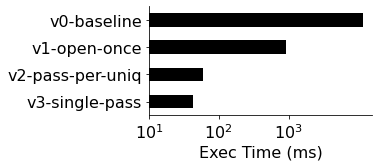

In [17]:
#q12

data = execute_times(100, 5000)
d = Series(data)
d = d.apply(lambda x: x*1000)
bar = d.plot.barh(figsize=(4,2), color = 'black')
bar.spines["top"].set_visible(False)
bar.spines["right"].set_visible(False)
bar.set_xscale('log')
bar.set_xticks([10**1, 10**2, 10**3])
bar.set_xlabel('Exec Time (ms)')
matplotlib.rcParams["font.size"] = 16
bar

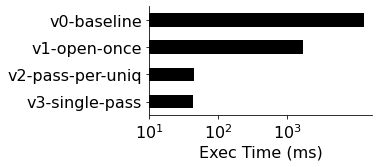

In [18]:
#q13

data = execute_times(1, 5000)
d = Series(data)
d = d.apply(lambda x: x*1000)
bar = d.plot.barh(figsize=(4,2), color = 'black')
bar.spines["top"].set_visible(False)
bar.spines["right"].set_visible(False)
bar.set_xscale('log')
bar.set_xticks([10**1, 10**2, 10**3])
bar.set_xlabel('Exec Time (ms)')
bar

It could be that the reason v3 works better is found in it's name, single pass. In the case where we have lots of unique words, a single pass would be faster than looping, but in the case of only 1 unique word, v2 is just about similar to v3.

# Part 4

In [19]:
def times_framed(com=None):
    uniq_list = [10, 5, 1]
    total_list = [1000, 2000, 5000, 10000]
    df = DataFrame(columns = [10, 5, 1])
    for i in total_list:
        for j in uniq_list:
            t = time_run_sec(j, i, commit=com)
            if j == 10:
                idx1 = t
            if j == 5:
                idx2 = t
            if j == 1:
                idx3 = t
        df.loc[i] = [idx1, idx2, idx3]
    return df

times_framed()

,10,5,1
1000,0.040456,0.039941,0.039647
2000,0.041395,0.040291,0.040014
5000,0.041818,0.042008,0.041644
10000,0.045796,0.044976,0.046028


(<matplotlib.axes._subplots.AxesSubplot at 0x7f2d700f1e80>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2d700eaeb8>)

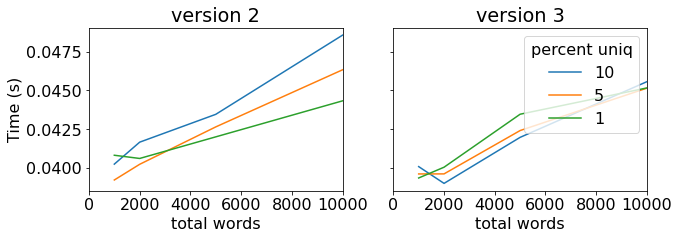

In [20]:
#q14

data1 = times_framed(versions["v2-pass-per-uniq"])
data2 = times_framed(versions["v3-single-pass"])
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,3))

ax1.plot(data1[10], label=10)
ax1.plot(data1[5], label=5)
ax1.plot(data1[1], label=1)
ax1.set_title('version 2')
ax1.set_ylabel('Time (s)')
ax1.set_xlabel('total words')
ax1.set_xticks([0, 2000, 4000, 6000, 8000, 10000])
ax1.set_xlim(0,10000)

ax2.plot(data2[10], label=10)
ax2.plot(data2[5], label=5)
ax2.plot(data2[1], label=1)
ax2.set_title('version 3')
ax2.set_xlabel('total words')
ax2.set_xticks([0, 2000, 4000, 6000, 8000, 10000])
ax2.set_xlim(0,10000)
ax2.legend(loc='upper right', title='percent uniq')
ax1, ax2

(<matplotlib.axes._subplots.AxesSubplot at 0x7f2d7008d710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2d70037e48>)

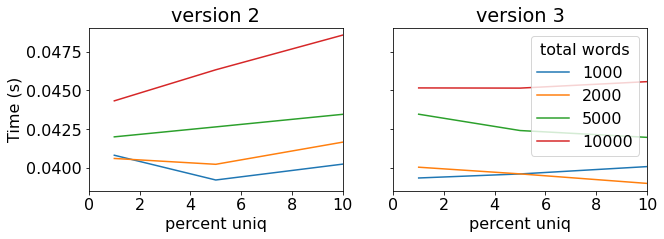

In [21]:
#q15

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,3))

data1.T.plot.line(ax=ax1)
ax1.set_title('version 2')
ax1.set_ylabel('Time (s)')
ax1.set_xlabel('percent uniq')
ax1.set_xlim(0,10)
ax1.get_legend().remove()

data2.T.plot.line(ax=ax2)
ax2.set_title('version 3')
ax2.set_ylabel('Time (s)')
ax2.set_xlabel('percent uniq')
ax2.set_xlim(0,10)
ax2.legend(loc='upper right', title='total words')

ax1, ax2

I honestly couldn't figure out why my times for version 2 were so much lower than the expected. My git checkout proceedures seem to be working, and the numbers for the other versions match up too. I tried so many things to fix it but couldn't figure it out. But based on the graphs from the project README, Q15 shows a clearer performance trend. Since the lines are nearly linear, the trend can be moer easily inferred as opposed to the kinked lines in Q14. 

In [29]:
df = DataFrame()
df.index.name = "total"
df.columns.name = "trial"
for i in range(10):
    total_words = 10000 * (i+1)
    print(total_words)
    uniq = total_words // 10
    for trial in range(5):
        df.loc[total_words/1000, trial] = time_run_sec(uniq, total_words)*1000 # TODO: call time_run_sec
df

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


trial,0,1,2,3,4
total,,,,,
10.0,49.310923,49.495220,52.226067,47.415733,47.334671
20.0,54.950476,54.825544,56.573868,56.414604,55.585384
30.0,65.135241,66.854715,64.301252,64.465046,62.842369
40.0,72.973013,76.412916,72.977304,72.481632,72.134495
50.0,82.029104,82.412243,81.083775,80.781698,81.933498
60.0,90.755224,89.538574,90.001822,91.465235,91.276407
70.0,98.927259,100.324392,99.551201,98.168135,100.766897
80.0,111.218452,107.508659,107.129812,111.512184,109.293461
90.0,121.848822,117.511272,118.902206,118.817091,118.801832


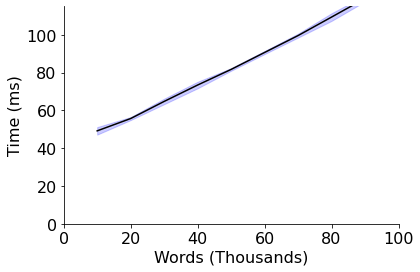

In [30]:
#q16

mean = df.mean(axis=1)
std = df.std(axis=1)

fig, ax = plt.subplots()
plt.fill_between(mean.index, mean-std, mean+std, color='b', alpha=0.2)
plt.ylim(0,115)
plt.xlim(0,100)
ax.plot(mean, color='black')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Words (Thousands)')

ax

# Part 5

In [24]:
class Counter():
    def __init__(self):
        self.items = dict()
        
    def __repr__(self):
        return repr(self.items)
        
    def __setitem__(self, key, value):
        key = key.upper()
        self.items[key] = value
        
    def __getitem__(self, key):
        key = key.upper()
        try:
            value = self.items[key]
            return value
        except KeyError:
            return 0
        
    def max_keys(self):
        final = []
        values = list(self.items.values())
        holder = 0
        index = 0
        for i in values:
            if holder < i:
                holder = i
                final = []
                final.append(list(self.items.keys())[index])
            elif holder == i:
                final.append(list(self.items.keys())[index])
            index += 1
        return final
        

In [25]:
#q17

c = Counter()
c["apple"]

0

In [26]:
#q18

c = Counter()
c["apple"] += 1
c["banana"] += 1
c["BANANA"] += 1
c["kiwi"] += 2
c["banana"]

2

In [27]:
#q19

c

{'APPLE': 1, 'BANANA': 2, 'KIWI': 2}

In [28]:
#q20

c.max_keys()

['BANANA', 'KIWI']